In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [ ]:
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [ ]:
train.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
train.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [ ]:
test.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [ ]:
train[['Gender', 'Burn Rate']].groupby('Gender').agg('mean')

,Burn Rate
Gender,
Female,0.422788
Male,0.484271


<Axes: title={'center': 'Burn Rate'}, xlabel='Gender'>

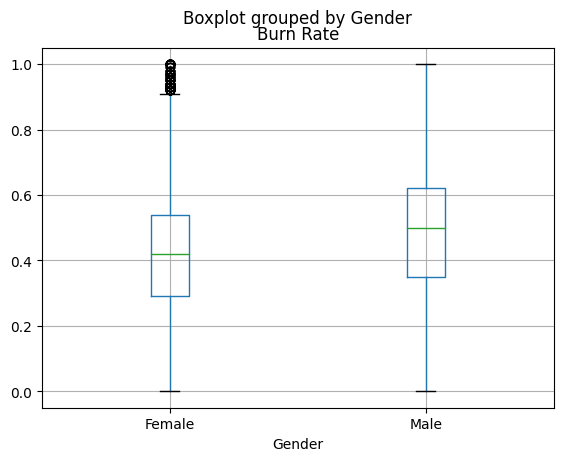

In [ ]:
train.boxplot(column=['Burn Rate'],by='Gender')

In [ ]:
train[['WFH Setup Available', 'Burn Rate']].groupby('WFH Setup Available').agg('mean')

,Burn Rate
WFH Setup Available,
No,0.517824
Yes,0.396010


<Axes: title={'center': 'Burn Rate'}, xlabel='WFH Setup Available'>

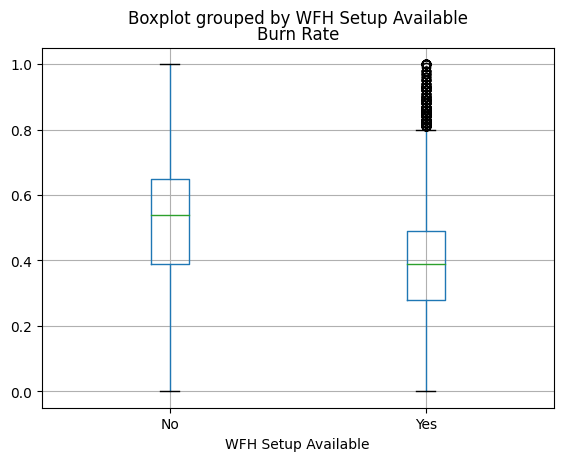

In [ ]:
train.boxplot(column=['Burn Rate'], by='WFH Setup Available')

In [ ]:
train[['Company Type', 'Burn Rate']].groupby('Company Type').agg('mean')

,Burn Rate
Company Type,
Product,0.450841
Service,0.452624


<Axes: title={'center': 'Burn Rate'}, xlabel='Company Type'>

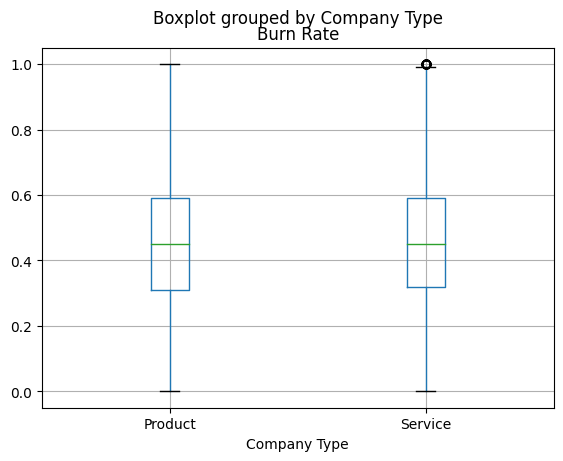

In [ ]:
train.boxplot(column=['Burn Rate'], by='Company Type')

In [ ]:
train[['Designation', 'Burn Rate']].groupby('Designation').agg('mean')

,Burn Rate
Designation,
0.0,0.151015
1.0,0.308133
2.0,0.435472
3.0,0.545460
4.0,0.686690
5.0,0.856995


<Axes: title={'center': 'Burn Rate'}, xlabel='Designation'>

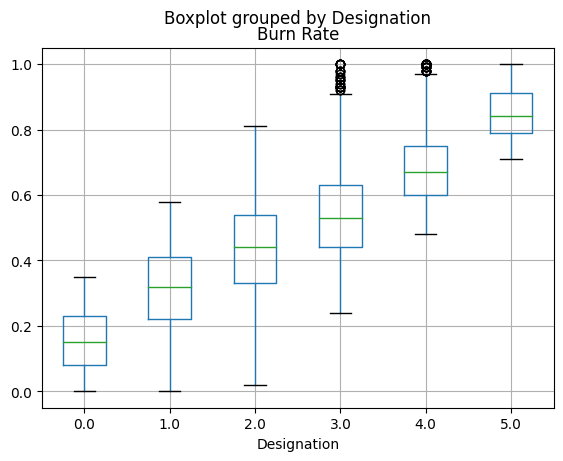

In [ ]:
train.boxplot(column=['Burn Rate'], by='Designation')

In [ ]:
train[['Resource Allocation', 'Burn Rate']].groupby('Resource Allocation').agg('mean')

,Burn Rate
Resource Allocation,
1.0,0.137572
2.0,0.253410
3.0,0.340330
4.0,0.418162
5.0,0.493428
6.0,0.576823
7.0,0.654707
8.0,0.736401
9.0,0.830911


<Axes: title={'center': 'Burn Rate'}, xlabel='Resource Allocation'>

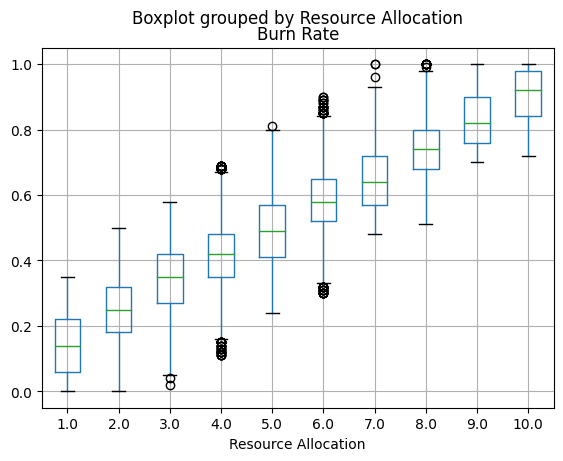

In [ ]:
train.boxplot(column=['Burn Rate'], by='Resource Allocation')

In [ ]:
train[['Mental Fatigue Score', 'Burn Rate']].groupby('Mental Fatigue Score').agg('mean')

,Burn Rate
Mental Fatigue Score,
0.0,0.001341
0.1,0.011333
0.2,0.005455
0.3,0.020909
0.4,0.008750
...,...
9.6,0.865625
9.7,0.878378
9.8,0.893250


<Axes: title={'center': 'Burn Rate'}, xlabel='Mental Fatigue Score'>

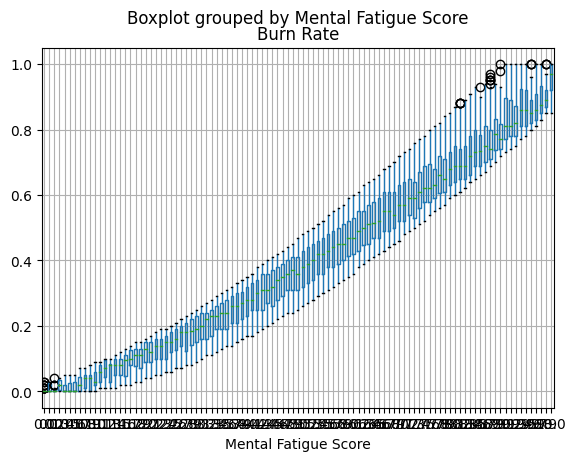

In [ ]:
train.boxplot(column=['Burn Rate'], by='Mental Fatigue Score')

In [ ]:
import seaborn as sns
sns.set_style(style="whitegrid")

title_font = {"family":"sans-serif",
              "weight":"bold",
              "color":"darkgreen",
              "size":16}

axis_font = {"family":"serif",
             "weight":"normal",
             "color":"darkgreen",
             "size":14}

In [ ]:
is_male = pd.get_dummies(train.Gender, drop_first=True)
is_service = pd.get_dummies(train["Company Type"], drop_first=True)
wfh_available = pd.get_dummies(train["WFH Setup Available"], drop_first=True)

In [ ]:
for loc, column in enumerate(["is_male", "is_service", "wfh_available"], start=2):
    train.insert(loc=loc, column=column, value=eval(column))

train.drop(columns=["Gender", "Company Type", "WFH Setup Available"], axis=1, inplace=True)

In [ ]:
train.head()

,Employee ID,Date of Joining,is_male,is_service,wfh_available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,0,1,0,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,1,1,1,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,0,0,1,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,1,1,1,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,0,1,0,3.0,7.0,6.9,0.52


In [ ]:
is_male = pd.get_dummies(test.Gender, drop_first=True)
is_service = pd.get_dummies(test["Company Type"], drop_first=True)
wfh_available = pd.get_dummies(test["WFH Setup Available"], drop_first=True)

for loc, column in enumerate(["is_male", "is_service", "wfh_available"], start=2):
    test.insert(loc=loc, column=column, value=eval(column))

test.drop(columns=["Gender", "Company Type", "WFH Setup Available"],
          axis=1,
          inplace=True)

In [ ]:
%%time
month_dict = {"01":31, "02":29, "03":31,
              "04":30, "05":31, "06":30,
              "07":31, "08":31, "09":30,
              "10":31, "11":30, "12":31}

for dataset in (train, test):
    for i in range(len(dataset)):
        x = dataset["Date of Joining"][i].split("-")    # sample output: ['2008', '09', '30']
        x = eval(f"{int(x[1])} * {month_dict[x[1]]} + {int(x[2])}")    # sample output: 300
        dataset.loc[i, "Date of Joining"] = x
    dataset["Date of Joining"] = dataset["Date of Joining"].astype("float32")
    dataset["Date of Joining"] = abs(dataset["Date of Joining"] - dataset["Date of Joining"].max())
    dataset["Date of Joining"] /= dataset["Date of Joining"].max()


CPU times: user 8.34 s, sys: 55.1 ms, total: 8.39 s
Wall time: 8.97 s


In [ ]:
# let's dive into the details
resource_nan = train["Resource Allocation"].isna()
mental_nan = train["Mental Fatigue Score"].isna()
burnrate_nan = train["Burn Rate"].isna()

# No "Burn Rate" & "Mental Fatigue Score" values
train[(burnrate_nan) & (mental_nan)]

,Employee ID,Date of Joining,is_male,is_service,wfh_available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
45,fffe31003500330034003700,0.404313,1,1,1,2.0,3.0,NaN,NaN
47,fffe3500320032003000,0.765499,0,0,1,3.0,6.0,NaN,NaN
122,fffe31003400350030003200,0.584906,0,0,0,3.0,5.0,NaN,NaN
127,fffe3900340036003300,0.921833,1,1,0,3.0,5.0,NaN,NaN
135,fffe32003200360039003000,0.641509,0,1,1,1.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
21507,fffe3300370033003600,0.911051,1,1,0,2.0,4.0,NaN,NaN
21701,fffe3400360038003300,0.126685,1,0,1,2.0,4.0,NaN,NaN
21888,fffe31003900360035003200,0.792453,1,1,0,3.0,6.0,NaN,NaN
21937,fffe3700350034003500,0.318059,1,1,0,3.0,6.0,NaN,NaN


In [ ]:
double_nan_indices = train[(burnrate_nan) & (mental_nan)].index

train.drop(index=double_nan_indices, axis=0, inplace=True)
train.reset_index(drop=True, inplace=True)
del double_nan_indices, is_male, is_service, wfh_available

In [ ]:
train.isna().sum()

Employee ID                0
Date of Joining            0
is_male                    0
is_service                 0
wfh_available              0
Designation                0
Resource Allocation     1366
Mental Fatigue Score    1945
Burn Rate                952
dtype: int64

In [ ]:
train_corr = train.corr()

<ipython-input-30-00d4a1001edf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_corr = train.corr()


<ipython-input-31-31a80979bfaf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, center=0, cmap= 'coolwarm')


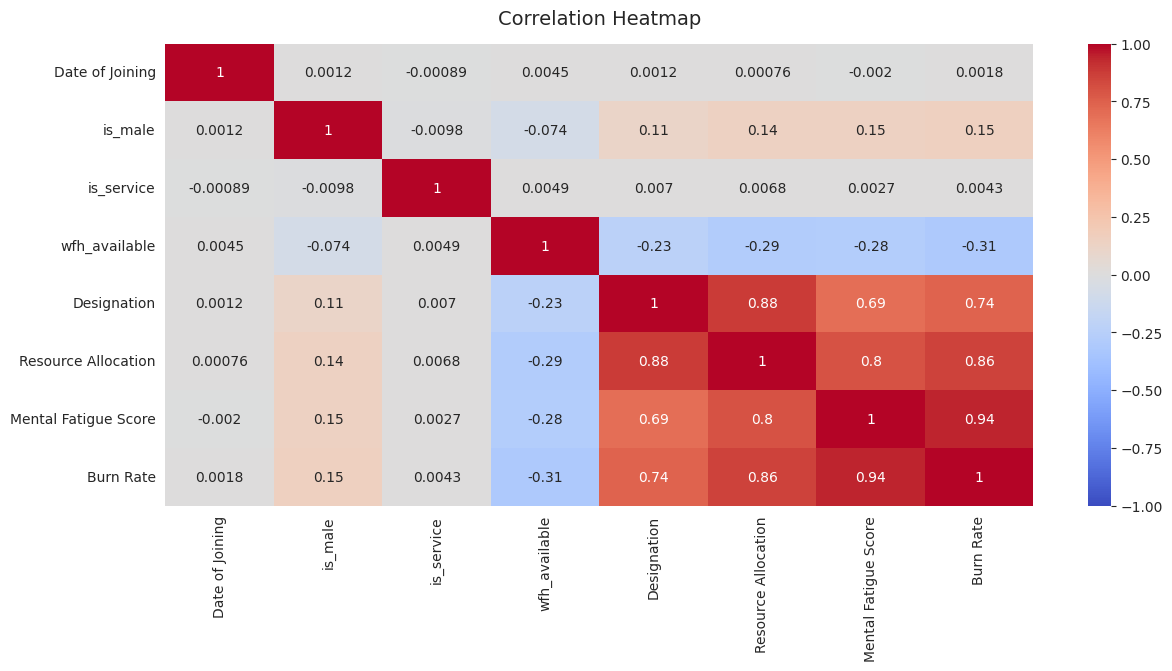

In [ ]:
plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, center=0, cmap= 'coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=14);
plt.savefig("heatmap.png")

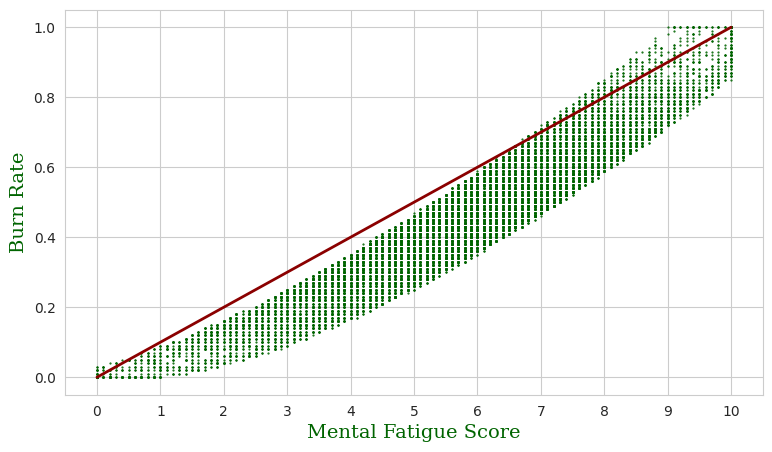

In [ ]:
plt.figure(figsize=(9, 5))
plt.scatter("Mental Fatigue Score", "Burn Rate", data=train, s=0.3, c="darkgreen")
plt.plot([0,10], [0, 1], linewidth=2, c="darkred")
plt.xlabel("Mental Fatigue Score", fontdict=axis_font)
plt.ylabel("Burn Rate", fontdict=axis_font)
plt.xticks(range(0,11))
plt.show()

In [ ]:
LINEAR_CONST = 7 / 10

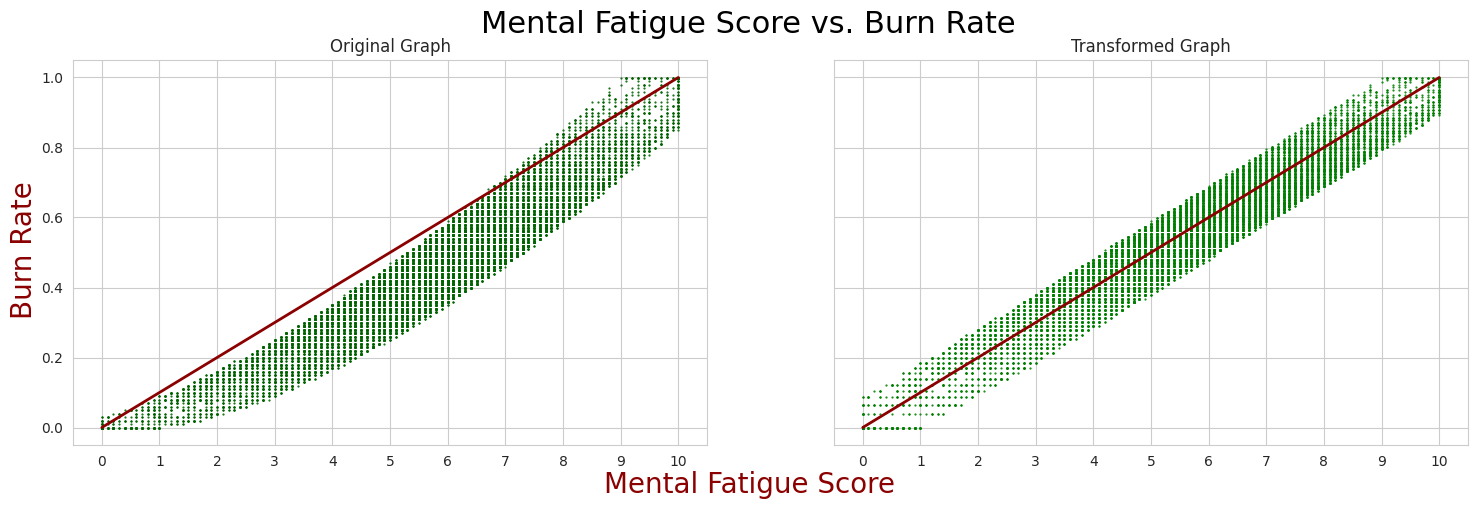

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True, figsize=(18 ,5))
fig.suptitle("Mental Fatigue Score vs. Burn Rate", color="black", size=22)

ax1.scatter("Mental Fatigue Score",
            "Burn Rate",
            data=train,
            s=0.3,
            c="darkgreen")
ax1.plot([0,10], [0, 1], linewidth=2, c="darkred")
ax1.set_title("Original Graph")
plt.xticks(range(0,11))
ax2.scatter(train["Mental Fatigue Score"],
            train["Burn Rate"] ** LINEAR_CONST,
            s=0.3,
            c="green")
ax2.plot([0,10], [0, 1], linewidth=2, c="darkred")
ax2.set_title("Transformed Graph")

fig.text(x=0.09, y=0.5,
         s="Burn Rate",
         va="center", rotation="vertical", size=20, c="darkred")
fig.text(x=0.42, y=0.03,
         s="Mental Fatigue Score",
         va="center", rotation="horizontal", size=20, c="darkred")
plt.show()

In [ ]:
train["Mental Fatigue Score"] **= (LINEAR_CONST**-1)
test["Mental Fatigue Score"] **= (LINEAR_CONST**-1)

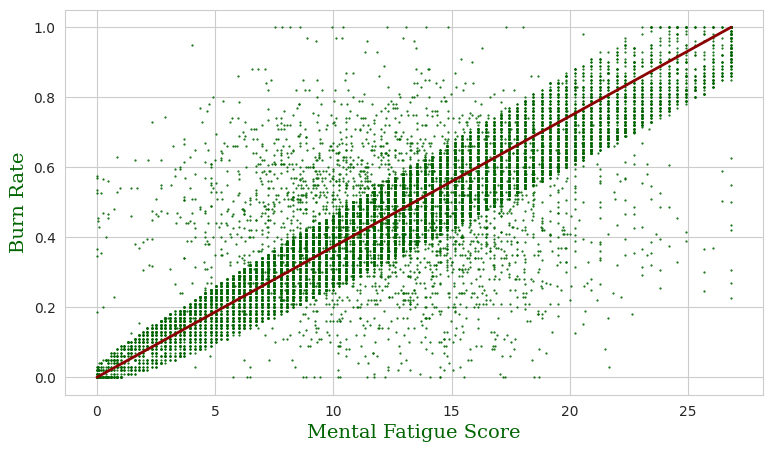

In [ ]:
train_copy = pd.DataFrame()
for i in train.columns[-3:]:
    fill_with = train[i].interpolate(method="linear")
    train_copy[i] = train[i].fillna(fill_with, inplace=False)

plt.figure(figsize=(9, 5))
plt.scatter("Mental Fatigue Score", "Burn Rate",
            data=train_copy,
            s=0.3,
            c="darkgreen")
plt.plot([0, train["Mental Fatigue Score"].max()], [0, 1],
         linewidth=2,
         c="darkred")
plt.xlabel("Mental Fatigue Score", fontdict=axis_font)
plt.ylabel("Burn Rate", fontdict=axis_font)
plt.show()

In [ ]:
describe_original = train.describe()
describe_original

,Date of Joining,is_male,is_service,wfh_available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22578.000000,22578.000000,22578.000000,22578.000000,22578.000000,21212.000000,20633.000000,21626.000000
mean,0.507425,0.476482,0.652228,0.540305,2.178935,4.481001,12.549698,0.452005
std,0.286254,0.499458,0.476274,0.498384,1.134938,2.046963,5.539585,0.198226
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.277628,0.000000,0.000000,0.000000,1.000000,3.000000,8.847018,0.310000
50%,0.495957,0.000000,1.000000,1.000000,2.000000,4.000000,12.624586,0.450000
75%,0.754717,1.000000,1.000000,1.000000,3.000000,6.000000,16.446874,0.590000
max,1.000000,1.000000,1.000000,1.000000,5.000000,10.000000,26.826958,1.000000


In [ ]:
from scipy import interpolate

In [ ]:
train_copy = train.copy(deep=True)

not_na1 = train_copy["Mental Fatigue Score"].notna()
not_na2 = train_copy["Burn Rate"].notna()

train_copy = train_copy[(not_na1) & (not_na2)]
del not_na2, not_na1

In [ ]:
fn_burn = interpolate.interp1d(x=train_copy["Mental Fatigue Score"],
                               y=train_copy["Burn Rate"],
                               kind="linear",
                               fill_value=None)
# function to find the mental fatigue score
fn_mental = interpolate.interp1d(y=train_copy["Mental Fatigue Score"],
                                 x=train_copy["Burn Rate"],
                                 kind="linear",
                                 fill_value=None)

In [ ]:
for i in train[train["Burn Rate"].isna()].index:
    train.loc[i, "Burn Rate"] = fn_burn(train.loc[i, "Mental Fatigue Score"])

for i in train[train["Mental Fatigue Score"].isna()].index:
    train.loc[i, "Mental Fatigue Score"] = fn_mental(train.loc[i, "Burn Rate"])

In [ ]:
train.isna().sum()

Employee ID                0
Date of Joining            0
is_male                    0
is_service                 0
wfh_available              0
Designation                0
Resource Allocation     1366
Mental Fatigue Score       0
Burn Rate                  0
dtype: int64

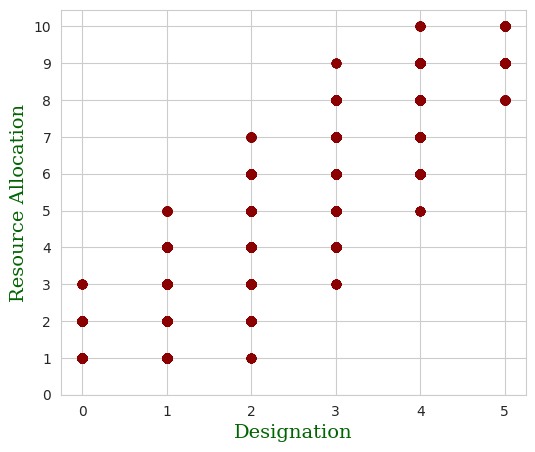

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter("Designation", "Resource Allocation", data=train, c="darkred")
plt.xlabel("Designation", fontdict=axis_font)
plt.ylabel("Resource Allocation", fontdict=axis_font)
plt.yticks(range(0,11))
plt.show()

In [ ]:
temp_value = train["Resource Allocation"][train["Designation"]==1].mean()

print(f"The mean value of Resource Allocation where \
Designation == 1 is: {temp_value:.2f}")

The mean value of Resource Allocation where Designation == 1 is: 2.58


In [ ]:
for i in range(6):    # 0 to 5, Designation values
    mean_value = train["Resource Allocation"][train["Designation"]==i].mean()

    # condition: "Designation" == i AND "Resource Allocation" is NaN
    condition = (train["Designation"]==i) & (train["Resource Allocation"].isna())

    # all NaN values are converted to mean values:
    train.loc[condition, "Resource Allocation"] = mean_value

del temp_value, train_copy, fn_burn, fn_mental

In [ ]:
train.isnull().sum(

)

Employee ID             0
Date of Joining         0
is_male                 0
is_service              0
wfh_available           0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [ ]:
describe_botox = train.describe()

print("--------------- Original Data ---------------")
display(describe_original.iloc[:3, -3:])
print("\n--------------- Cleaned Data ---------------")
display(describe_botox.iloc[:3, -3:])

--------------- Original Data ---------------


,Resource Allocation,Mental Fatigue Score,Burn Rate
count,21212.000000,20633.000000,21626.000000
mean,4.481001,12.549698,0.452005
std,2.046963,5.539585,0.198226



--------------- Cleaned Data ---------------


,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22578.000000,22578.000000,22578.000000
mean,4.480784,12.514069,0.452228
std,2.031909,5.555049,0.198017


In [ ]:
train[['is_male', 'Burn Rate']].groupby('is_male').agg('mean')

,Burn Rate
is_male,
0,0.423240
1,0.484077


<Axes: title={'center': 'Burn Rate'}, xlabel='is_male'>

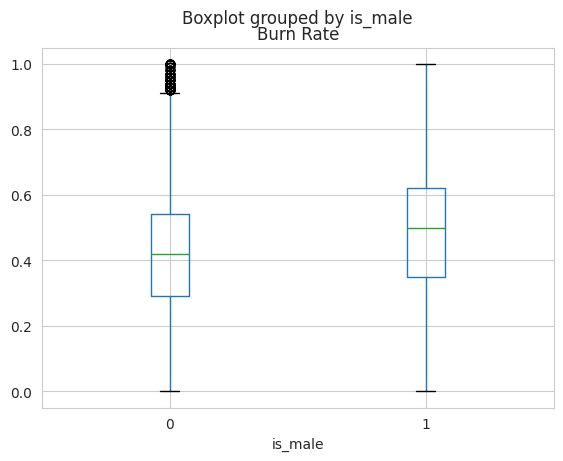

In [ ]:
train.boxplot(column=['Burn Rate'], by='is_male')

<Axes: title={'center': 'Burn Rate'}, xlabel='is_male'>

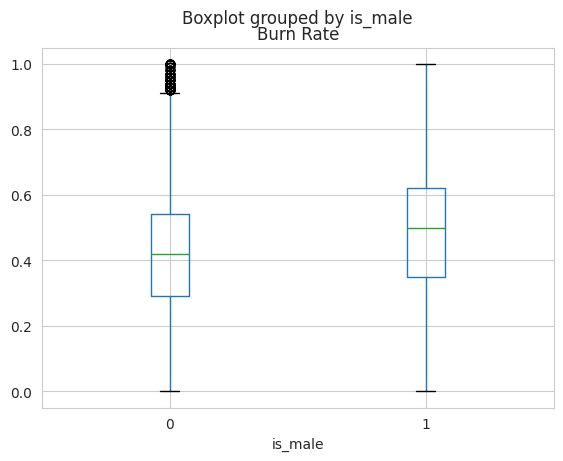

In [ ]:
train.boxplot(column=['Burn Rate'], by='is_male')

In [ ]:
train[['wfh_available', 'Burn Rate']].groupby('wfh_available').agg('mean')

,Burn Rate
wfh_available,
0,0.517557
1,0.396646


<Axes: title={'center': 'Burn Rate'}, xlabel='wfh_available'>

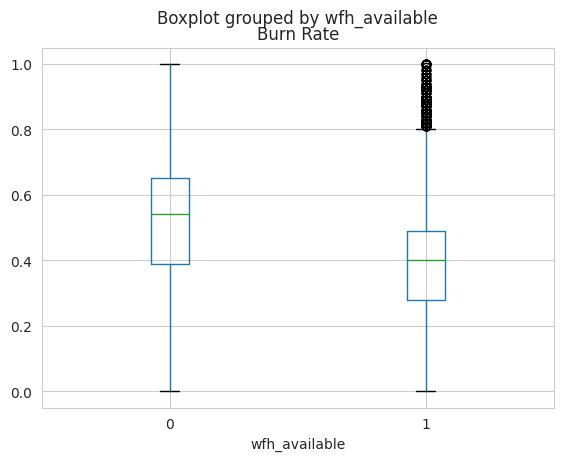

In [ ]:
train.boxplot(column=['Burn Rate'], by='wfh_available')

In [ ]:
train[['is_service', 'Burn Rate']].groupby('is_service').agg('mean')

,Burn Rate
is_service,
0,0.451136
1,0.452810


In [ ]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

Id_train = train['Employee ID']
X=train.drop(['Burn Rate', 'Employee ID', 'Date of Joining'],axis=1)
train['Burn Rate']=LabelEncoder().fit_transform(train['Burn Rate'])
y=train['Burn Rate']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#Pred_test = df_test[df_test.columns.values.tolist()[2:7]]
X_train.shape

(15804, 6)

In [ ]:
from sklearn.model_selection import train_test_split
#ניסיון ניצן
from sklearn.datasets import make_classification
#לא ניסיון
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
X_train, X_val, \
y_train, y_val = train_test_split(train.iloc[:, 1:-1],
                                         train.iloc[:, -1],
                                         test_size=0.25,
                                         shuffle=True,
                                         random_state=19)
X_test = test.iloc[:, 1:]
y_test = None

print("Shape of the train set:\nX_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nShape of the validation set:\nX_val:", X_val.shape)
print("y_val:", y_val.shape)

Shape of the train set:
X_train: (16933, 7)
y_train: (16933,)

Shape of the validation set:
X_val: (5645, 7)
y_val: (5645,)


In [ ]:
scale = StandardScaler()
normalize = MinMaxScaler((0, 1))

# scaled set: mean=0, standard deviation=1
X_train_std = scale.fit_transform(X_train)
X_val_std = scale.fit_transform(X_val)
X_test_std = scale.fit_transform(X_test)

# normalized set: values are between [0, 1]
X_train_norm = normalize.fit_transform(X_train)
X_val_norm = normalize.fit_transform(X_val)
X_test_norm = normalize.fit_transform(X_test)

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error as mae
from statsmodels.tools.eval_measures import mse, rmse

In [ ]:
def show_errors(y_validations, y_predictions):
    """Function to show error statistics of the validation part.
    y_validations: Validation values
    y_predictions: Predicted values"""
    mae_fn = mae(y_validations, y_predictions)
    mse_fn = mse(y_validations, y_predictions)
    rmse_fn = rmse(y_validations, y_predictions)

    print("\n---------Error Statistics of Validation Part---------")
    print(f"Mean Absolute Error (MAE)             : {mae_fn:.4f}")
    print(f"Mean Square Error (MSE)               : {mse_fn:.4f}")
    print(f"Root Mean Square Error (RMSE)         : {rmse_fn:.4f}\n")

In [ ]:
X_train_ols = sm.add_constant(X_train)
ols_results_model = sm.OLS(y_train, X_train_ols)
ols_results = ols_results_model.fit()

In [ ]:
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Burn Rate   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.800e+04
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:00:42   Log-Likelihood:                -53160.
No. Observations:               16933   AIC:                         1.063e+05
Df Residuals:                   16925   BIC:                         1.064e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.6244      0.169      9.624      0.000       1.294       1.955
Date of Joining          0.1753      0.150      1.166      0.244      -0.119       0.470
is_male                  0.2846      0.087      3.268      0.001       0.114       0.455
is_service              -0.0178      0.090     -0.197      0.843      -0.194       0.159
wfh_available           -0.7763      0.090     -8.584      0.000      -0.954      -0.599
Designation             -0.2600      0.081     -3.199      0.001      -0.419      -0.101
Resource Allocation      2.3844      0.055     43.356      0.000       2.277       2.492
Mental Fatigue Score     2.6924      0.013    205.123      0.000       2.667       2.718
==============================================================================
Omnibus:                      534.280   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.202
Skew:                           0.121   Prob(JB):                     3.88e-61
Kurtosis:                       2.421   Cond. No.                         68.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# validation data
X_val_ols = sm.add_constant(X_val)
ols_results_val_model = sm.OLS(y_val, X_val_ols)
ols_results_val = ols_results_val_model.fit()
ols_results_val.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Burn Rate   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     9217.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:00:52   Log-Likelihood:                -17734.
No. Observations:                5645   AIC:                         3.548e+04
Df Residuals:                    5637   BIC:                         3.554e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2899      0.293      4.403      0.000       0.716       1.864
Date of Joining          0.3192      0.259      1.232      0.218      -0.189       0.827
is_male                  0.1619      0.151      1.070      0.285      -0.135       0.458
is_service               0.2966      0.157      1.891      0.059      -0.011       0.604
wfh_available           -0.8437      0.157     -5.366      0.000      -1.152      -0.535
Designation             -0.1155      0.141     -0.819      0.413      -0.392       0.161
Resource Allocation      2.3533      0.094     24.924      0.000       2.168       2.538
Mental Fatigue Score     2.6885      0.023    118.670      0.000       2.644       2.733
==============================================================================
Omnibus:                      144.024   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.879
Skew:                           0.086   Prob(JB):                     2.02e-17
Kurtosis:                       2.454   Cond. No.                         67.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
show_errors(y_val,
            ols_results_val.predict(sm.add_constant(X_val_std))
           )


---------Error Statistics of Validation Part---------
Mean Absolute Error (MAE)             : 43.9747
Mean Square Error (MSE)               : 2162.3029
Root Mean Square Error (RMSE)         : 46.5006



In [ ]:
def show_comparison(y_validations, y_predictions):
    """To see the comparison, please provide:
    y_validations and y_predictions"""
    plt.figure(figsize=(12,6))
    plt.scatter(y_validations,
                y_predictions,
                color="k", alpha=0.6, s=10, label="Predicted")
    plt.plot(y_validations, y_validations, "r--", label="True")
    plt.xlabel("True Values", fontdict=axis_font)
    plt.ylabel("Predicted Values", fontdict=axis_font)
    plt.title("True vs. Predicted Values", fontdict=title_font)
    plt.legend(fontsize="large", loc="best")
    plt.show()

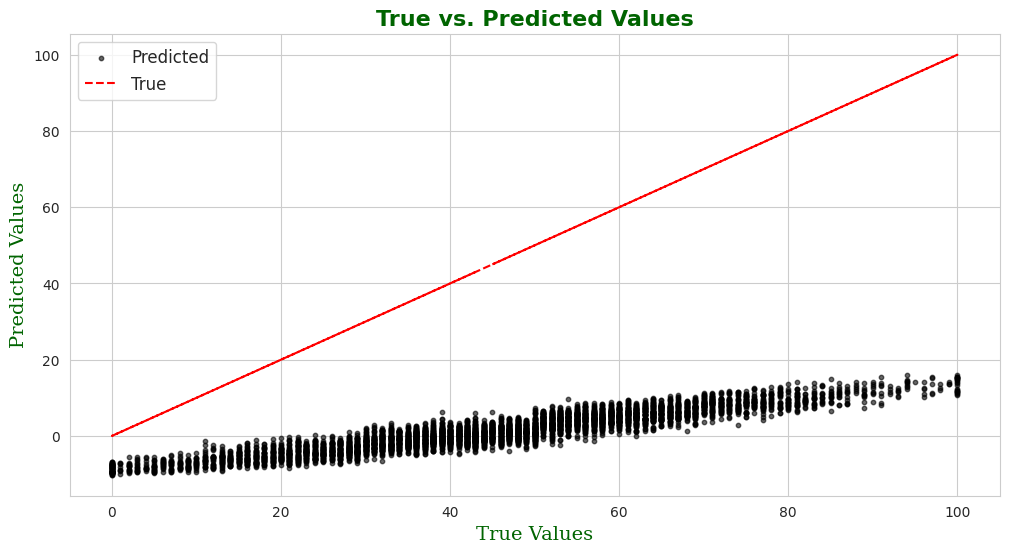

In [ ]:
show_comparison(y_val,
                ols_results_val.predict(sm.add_constant(X_val_std)))

In [ ]:
predict = ols_results.predict(X_train_ols)
errors = y_train - predict
print("The average error between the predicted & real value: \
{:.3g}".format(np.mean(errors)))

The average error between the predicted & real value: 3.31e-14


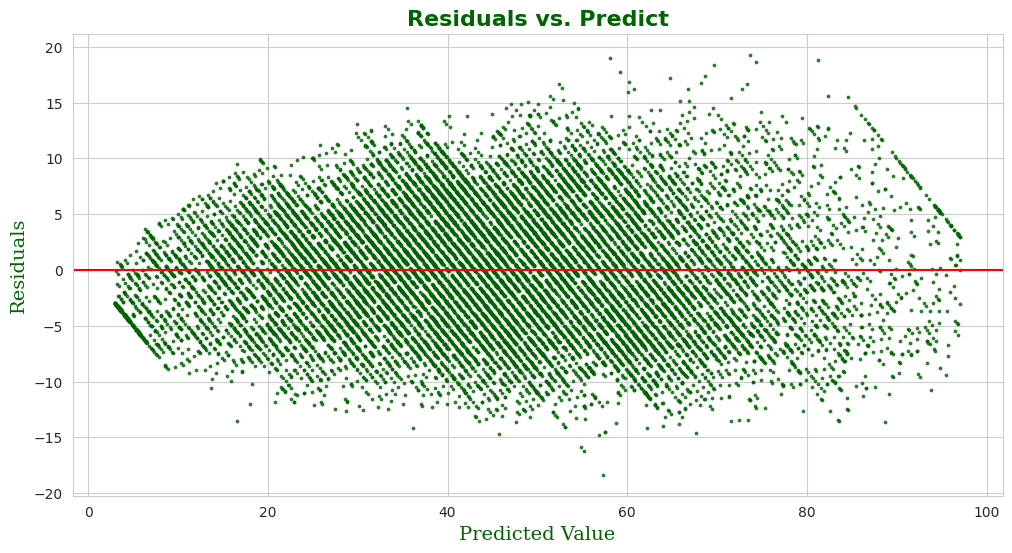

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(predict, errors, color="darkgreen", s=3, alpha=0.75)
plt.xlabel('Predicted Value', fontdict=axis_font)
plt.ylabel('Residuals', fontdict=axis_font)
plt.axhline(y=0, color="r")
plt.title('Residuals vs. Predict', fontdict=title_font)
plt.show()

In [ ]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predict, errors)
lev_stats = levene(predict, errors)

print("Bartlett test statistic value is {0:.2f} \
and p-value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:.2f} \
and p-value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 20802.97 and p-value is 0
Levene test statistic value is 14402.30 and p-value is 0


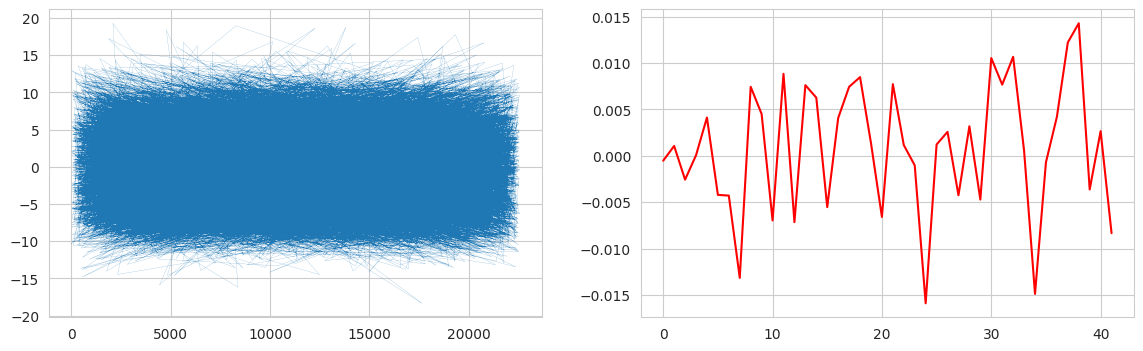

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(errors, linewidth=0.1)

plt.subplot(1,2,2)
from statsmodels.tsa.stattools import acf
acf_data = acf(errors)
plt.plot(acf_data[1:], color="red")
plt.show()

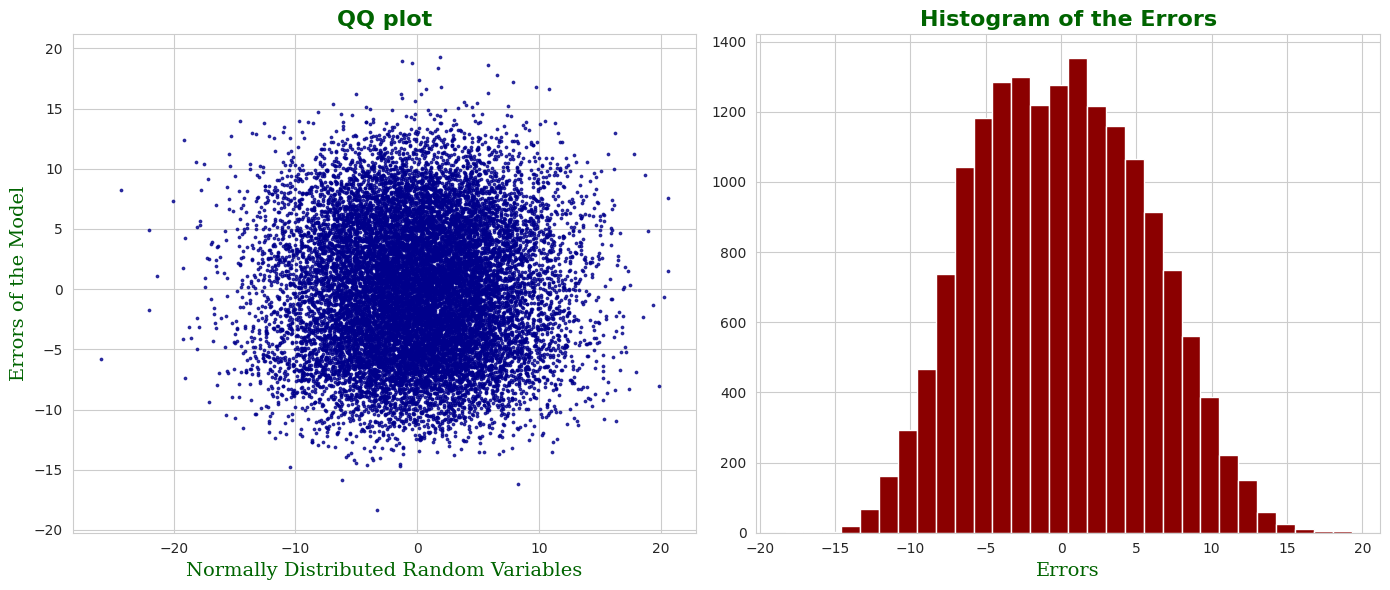

In [ ]:
rand_nums = np.random.normal(np.mean(errors),
                             np.std(errors),
                             len(errors))
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(rand_nums, errors, color="darkblue", s=3, alpha=0.75)
plt.xlabel("Normally Distributed Random Variables", fontdict=axis_font)
plt.ylabel("Errors of the Model", fontdict=axis_font)
plt.title("QQ plot", fontdict=title_font)
plt.subplot(1,2,2)
plt.hist(errors, bins=30, color="darkred")
plt.xlabel("Errors", fontdict=axis_font)
plt.title("Histogram of the Errors", fontdict=title_font)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0:.2f} and \
p value is {1:.5g}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0:.2f} and p \
value is {1:5g}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 278.20 and p value is 3.8833e-61
Normality test statistics is 534.28 and p value is 9.6084e-117


In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

In [ ]:
lasso_CV_model = LassoCV(alphas=np.logspace(-8, 6, num=30, base=10.0),
                         cv=10,
                         n_jobs=-1)
lasso_CV = lasso_CV_model.fit(X_train_std, y_train)

lasso_CV_score = lasso_CV.score(X_train_std, y_train)
print(f"Adjusted R-square value of train set: {lasso_CV_score:.3f}")
lasso_CV_score = lasso_CV.score(X_val_std, y_val)
print(f"Adjusted R-square value of validation set: {lasso_CV_score:.3f}")

show_errors(y_val, lasso_CV.predict(X_val_std))

Adjusted R-square value of train set: 0.921
Adjusted R-square value of validation set: 0.920

---------Error Statistics of Validation Part---------
Mean Absolute Error (MAE)             : 4.6261
Mean Square Error (MSE)               : 31.3873
Root Mean Square Error (RMSE)         : 5.6024



In [ ]:
from keras import models, layers
from keras.optimizers import Adam, schedules

In [ ]:
def dense_layer(unit):
    model.add(layers.Dense(units=unit))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))

In [ ]:
model = models.Sequential()
model.add(layers.Dense(units=16,
                       input_shape=(X_train_norm.shape[1], ),
                       kernel_initializer="GlorotUniform",
                       name="Hidden_Layer1"))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
#dense_layer(64)
model.add(layers.Dropout(0.05))
#dense_layer(128)
model.add(layers.Dense(1, name="Output_Layer"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer1 (Dense)       (None, 16)                128       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 Output_Layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 209
Trainable params: 177
Non-trainable params: 32
_________________________________________________________

In [ ]:
lr_schedule = schedules.ExponentialDecay(initial_learning_rate=1e-3,
                                         decay_steps=10000,
                                         decay_rate=0.9)

opt = Adam(learning_rate=lr_schedule)
model.compile(optimizer=opt, loss="mse", metrics=["mae"])
model_history = model.fit(X_train_norm, y_train,
                          epochs=30,
                          batch_size=32,
                          validation_data=(X_val_norm, y_val),
                          shuffle=False,
                          verbose=0)

AttributeError: ignored

In [ ]:
show_errors(y_val, model.predict(X_val_norm).reshape(-1))

177/177 [==============================] - 1s 3ms/step

---------Error Statistics of Validation Part---------
Mean Absolute Error (MAE)             : 44.9523
Mean Square Error (MSE)               : 2409.1545
Root Mean Square Error (RMSE)         : 49.0831



In [ ]:
history_dict = model_history.history

train_loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
train_mae = history_dict["mae"]
val_mae = history_dict["val_mae"]

NameError: ignored

NameError: ignored

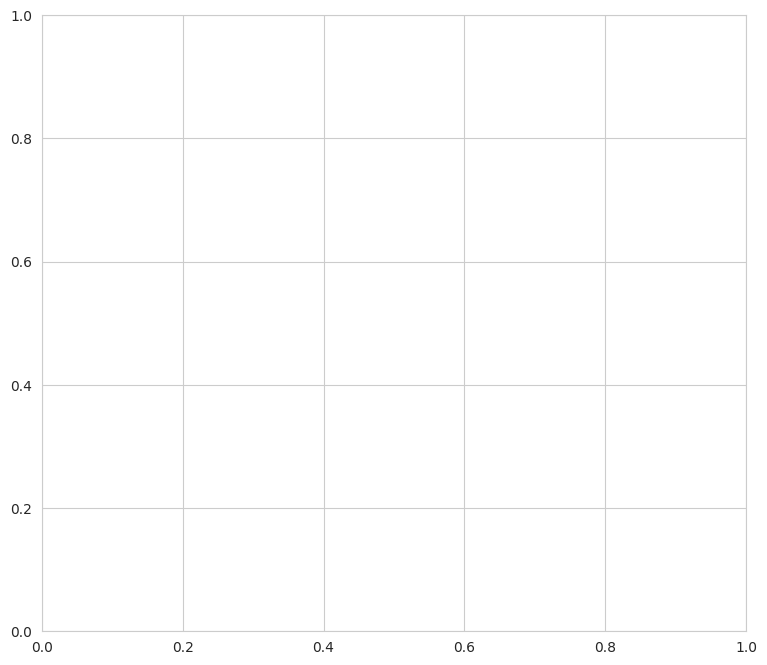

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(range(1, len(train_mae)+1), train_mae,
         color="darkgreen", linewidth=2, label="Train Set")

plt.plot(range(1, len(val_mae)+1), val_mae,
        "r--", linewidth=2, label="Valdation Set")

plt.xlabel("Epochs", fontdict=axis_font)
plt.ylabel("Mean Absolute Error", fontdict=axis_font)
plt.legend(fontsize="medium", loc=(0.7,0.5))

plt.subplot(1,2,2)
plt.plot(range(1, len(train_loss)+1), train_loss,
         color="darkgreen", linewidth=2, label="Train Set")

plt.plot(range(1, len(val_loss)+1), val_loss,
        "r--", linewidth=2, label="Valdation Set")

plt.xlabel("Epochs", fontdict=axis_font)
plt.ylabel("Loss Value", fontdict=axis_font)
plt.legend(fontsize="medium", loc=(0.7,0.5))

plt.show()